# Introduction to Clustering Recap and Practical Examples

### BG Science and Consultancy Machine Learning Training/Hack Week


## 1. Cluster Analysis Recap
<div class="alert alert-block alert-warning">
    
1. Unsupervised Machine Learning Technique  
<br>
2. Classifies things into different groups or 'clusters'  
<br>
3. Aim is to group 'similar' items into clusters  
<br>
4. Looks at the 'distance' between points within a cluster and points from nearest cluster.  
<br>
5. Distance can be measured in a [number of ways](https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21), but usually [Euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance)  
<br>
6. Clustering can be done with n-dimensional data (n = how many columns in your dataset)  
<br>
7. There are broadly two types of clustering:
   * <i>Hard clustering</i> - each data point either belongs to cluster completely or not
   * <i>Soft clustering</i> - instead of putting each point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned ([fuzzy clustering](https://www.statisticshowto.com/fuzzy-clustering/))  
<br> 
8. There are many clustering algorithms:
   * <i>Centroid models</i> - iterative clustering algorithms where notion of similarity dervied by closeness of data point to the centroid of the cluster. Requires prior knowlege of the number of clusters (k). E.g. <b> K-Means </b> 
   * <i>Connectivity or Heirarchical models</i> - based on notion that data points closer in data space exhibit more similarity to each other that the data points lying farther away. Can follow 'bottom up' or 'top down' approach. Easy to interpret but lacks scalability for handling large datasets E.g. <b>Heirarchical</b> 
   * <i>Distribution models</i> - based on notion of how probable is it that all data points in the cluster belong to the same distribution (e.g. normal, gaussian). These models often suffer from overfitting. E.g. <b>Gaussian Mixture</b> 
   * <i>Density models</i> - these models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assigns the data points within these regions to the same cluster. E.g. <b>DBSCAN</b>, <b>OPTICS</b>  
<br>

![alt text](Types_ML_problems3.png "Types of Machine Learning Problems")
9. There are many methods to evaluate your chosen cluster models performance (e.g. [confusion matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/), [homogeneity score, completeness score, v-measure score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html), [adjusted rand score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html), [AMI score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html), silhouette coefficient). However, only a few that do not require ground truth labels, e.g. **Silhouette Coefficient**  
<br>
10. Think about preparing your data before clustering:
   * Rows are observations and columns are variables
   * Missing values in the data should be removed or estimated
   * *Feature Scaling* - Data may need to be *scaled* (i.e. normalised/standarised) to make variables comparable. This consists of transforming variables such that they have values that for example; range between 0 and 1, or have zero mean and standard deviation 1. 
   * Pre-processing your data if very high dimensional (i.e. has lots of columns), using another unsupervised learning technique: '*Dimensionality Reduction*', e.g. *Principle Components Analysis (PCA)*. Further information on PCA in Machine Learning can be found [here](https://towardsdatascience.com/all-you-need-to-know-about-pca-technique-in-machine-learning-443b0c2be9a1), [here](https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a) and [here.](https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/)</div>
   

## 2. Clustering Example - Iris Data

Scikit-learn comes with a few small standard [datasets](https://scikit-learn.org/stable/datasets/index.html) that do not require you to download any file from an external website. These datasets are useful to quickly illustrate the behavior of the various Machine Learning algorithms implemented in scikit-learn. They are however often too small to be representative of real world machine learning tasks.

We will use the 'Iris' dataset to demonstrate some of the various *clustering* algorithms in python. The Iris dataset consists of 3 different types of iris flowers (Setosa, Versicolour and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns (**features**) being: Sepal Length, Sepal Width, Petal Length and Petal width. More information on the Iris dataset can be found [here.](https://en.wikipedia.org/wiki/Iris_flower_data_set)


## 2.1 Preparation

#### Running code in Jupyter notebook
To run a python cell in this jupyter notebook, either:
* highlight the target cell and hit the 'Run' icon in the bar above; or
* highlight the target cell and press `Ctr+Enter`

#### Adding Preliminary Libraries
We will first add some important libraries that will be useful for these examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import and load the Iris Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

Convert iris numpy array into pandas dataframe, use iris feature names as dataframe column names and add 'Type' column. The 'Type' column is our 'truth' or 'target', and we will use this to compare our predicted clustering labels against. 


In [3]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Adjust dataset for 'unsupervised' learning - Split iris data into features and labels

The dataset currently has the target variable 'Type' which identifies the iris species of each row of data (0,1 or 2, which corresponds to Iris-setosa, Iris-versicolour and Iris-virginica respectively).  
We need to remove the target variable (label) so that this dataset can be used to work in an unsupervised learning environment. Thus we will not know which points belong to which group (type of iris flower).  
*The aim will then be to group each measured flower according to their features*  
In this case, the features of the iris data set are:
* sepal length
* sepal width
* petal length
* petal width  


In [4]:
# Features: Unsupervised Learning/Unlabelled dataset - target values ('Type') removed
iris_X = iris.data

# Labels: Separate target variable from original dataset and again convert into an array by using numpy
iris_Y = iris.target

## 2.2 Inspect Data

#### Some Summary Statistics

In [5]:
# Convert iris_X array to pandas dataframe and add feature names as column headers
iris_Xdf = pd.DataFrame(iris_X)
iris_Xdf.columns = iris.feature_names

# Summary Stats
iris_Xdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualise Data

Lets plot the data. We plot sepal length v sepal width, and petal length v petal width. We might be able to visualise some clusters from plotting this data. 

Text(0, 0.5, 'Petal width (cm)')

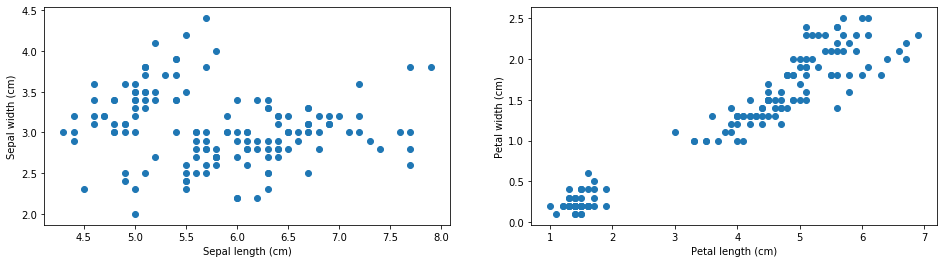

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

axes[0].scatter(iris_Xdf.iloc[:,0],iris_Xdf.iloc[:,1])
axes[0].set_xlabel('Sepal length (cm)')
axes[0].set_ylabel('Sepal width (cm)')

axes[1].scatter(iris_Xdf.iloc[:,2],iris_Xdf.iloc[:,3])
axes[1].set_xlabel('Petal length (cm)')
axes[1].set_ylabel('Petal width (cm)')

Another useful tool for visualising and exploratory data analysis is to use 'seaborn'. Seaborn is a layer on top of matlplotlib which has additional visualisations. We can import seaborn and plot a scatter matrix showing each pair of features (sepal width and length, petal width and length) in the data. 

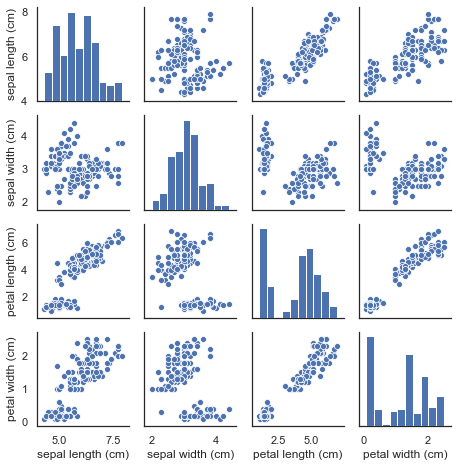

In [7]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.pairplot(iris_Xdf, height=1.6)

From both sets of plots, it looks like there could be 2 distinct clusters. However, these could hiding further smaller clusters. There also appears to be positive correlation between the petal length and petal width column which is a good indicator for clustering. We need to explore further by doing some cluster analysis.  

## 2.3 Clustering Algorithms

In the introductory presentation we looked at two clustering methods; K-Means and Heirarchical. In this tutorial, we will focus on K-Means and Hierarchical clustering to create clusters out of the unlabelled iris dataset we created above (iris_X), however we will also look at another density based method: DBSCAN. 
DBSCAN is a popular density based clustering alogorithm which was not covered in the introductory talk, however it has many powerful features.


## K-Means Clustering

One of the most commonly used and popular methods of clustering is K-Means. K-means is extremely easy to implement and is also computationally very efficient compared to other clustering algorithms, which may explain its popularity. 


##### Import Library

In [8]:
from sklearn.cluster import KMeans

##### Visualise Data

Lets look at the plots of the data again

Text(0, 0.5, 'Petal width (cm)')

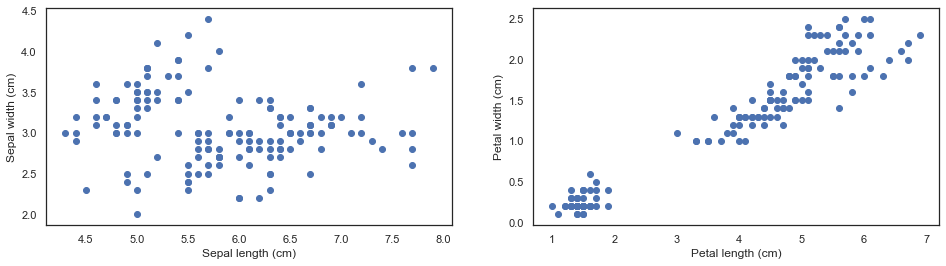

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

axes[0].scatter(iris_Xdf.iloc[:,0],iris_Xdf.iloc[:,1])
axes[0].set_xlabel('Sepal length (cm)')
axes[0].set_ylabel('Sepal width (cm)')

axes[1].scatter(iris_Xdf.iloc[:,2],iris_Xdf.iloc[:,3])
axes[1].set_xlabel('Petal length (cm)')
axes[1].set_ylabel('Petal width (cm)')

##### Deciding Value of K

Recall that K-Means clustering requires prior knowledge of the number of clusters, k.  
From plotting the Iris dataset it looks like there could be 2 clusters. However, they are very irregular in shape with raggedy edges, and there could be other information that the plots are not showing.  
With real life unsupervised learning problems we will not know the number of clusters, and cluster analysis will be an exploratory exercise.  
*Prior knowledge*: You may have some insight into your dataset that means you have an idea of what the number of clusters will be.  
In this example, we are going to assume that we do not have any prior knowledge and so a *data driven* approach to deciding the value of k is required.  
In the presentation we looked at the such an approach using the '*Elbow Method*'.  
Using the unsupervised learning iris dataset we created earlier (Iris_X), we will use the Elbow method to decide on the value of k.  
Our goal with clustering is to minimise within cluster sum of square distance ([inertia](https://scikit-learn.org/stable/modules/clustering.html)), and maximise the distance between clusters. 

We first run K-means for values of k from 1 to 10

In [10]:
wcss = []                             #wcss = within cluster sum of squares (inertia)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)

We now plot the within cluster sum of squares (WCSS) obtained from the above code. 

Text(0, 0.5, 'WCSS')

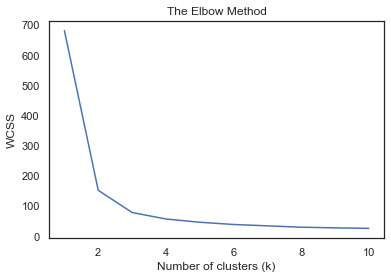

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

In the elbow graph we look for points where the drop falls and the line smooths out, i.e. the elbow point.  
In the plot above the elbow point comes at around 3 and this our optimal number of clusters.  
If we look at the plot carefully, as k increases above 3, there is no big change in the WCSS and it starts to level out. So we take k=3. Plotting the data showed what looked like 2 clusters, however the elbow method reveals that 3 (maybe 4) is better.

##### Running the K-Means Model

We now run K-Means clustering on the unlabelled Iris dataset with k=3. It only takes a few lines of code! :)

<div class="alert alert-block alert-warning">
    
<b>Note:</b> The K-Means clustering function in scikit-learn has parameters that you can set. Read more about them [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). In this example, we are using the default settings, and only setting the number of clusters.</div>

In [12]:
cluster_Kmeans = KMeans(n_clusters=3)            # Initialise Model
model_kmeans = cluster_Kmeans.fit(iris_X)        # Fit Model
pred_kmeans = model_kmeans.labels_               # Class Labels
pred_kmeans                                      # Print results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

The above output array contains the predicted labels: 0, 1 or 2 (groups of each flower) for each sample/row of data in the unsupervised learning iris dataset (iris_X).

We can plot this to visualise better. 

Text(0.5, 1.0, 'K-Means Prediction')

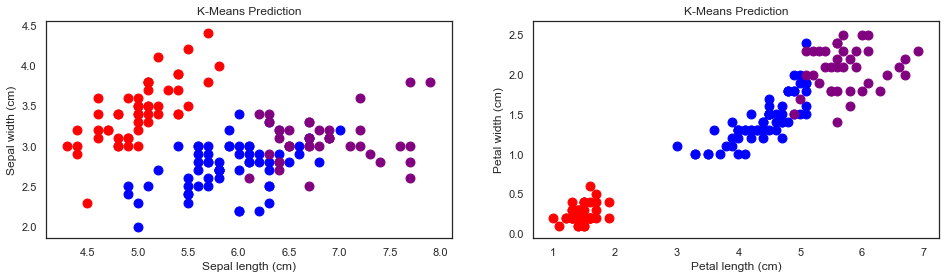

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

axes[0].scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'blue')
axes[0].scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'red')
axes[0].scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1], s = 80, c = 'purple')
axes[0].set_xlabel('Sepal length (cm)')
axes[0].set_ylabel('Sepal width (cm)')
axes[0].set_title('K-Means Prediction')

axes[1].scatter(iris_X[pred_kmeans == 0, 2], iris_X[pred_kmeans == 0, 3], s = 80, c = 'blue')
axes[1].scatter(iris_X[pred_kmeans == 1, 2], iris_X[pred_kmeans == 1, 3], s = 80, c = 'red')
axes[1].scatter(iris_X[pred_kmeans == 2, 2], iris_X[pred_kmeans == 2, 3], s = 80, c = 'purple')
axes[1].set_xlabel('Petal length (cm)')
axes[1].set_ylabel('Petal width (cm)')
axes[1].set_title('K-Means Prediction')

The plots show the three clusters - one distinct cluster (blue points) and two clusters overlapping each other (red and purple points), which is particularly evident in the sepal measurements. 

It shows that some of the points in the red and purple clusters are similar for the features in this dataset (sepal length, sepal width, petal length, petal width).  

<div class="alert alert-block alert-warning">
<b>Note:</b> There could be features that were not measured, and so not present in the dataset, that would clearly separate the red and purple clusters. It is the same for any unsupervised learning, you need to have the right features to separate the groups in the best way.</div> 


<div class="alert alert-block alert-info">
<b>Exercise:</b> Try running the K-Means model and plotting the results for different values of k.</div>


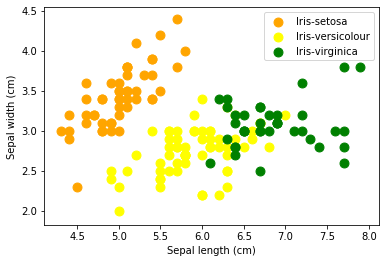

In [31]:
# Write your code here

##### Compare with Actual 'Target' Data

With the Iris dataset, we do have the actual target labels (iris type) which we separated out to create our unsupervised learning scenario. 
Although we will not always have such 'truth' data in reality, lets plot and compare our kmeans results using k=3 with the actual iris flower types. 

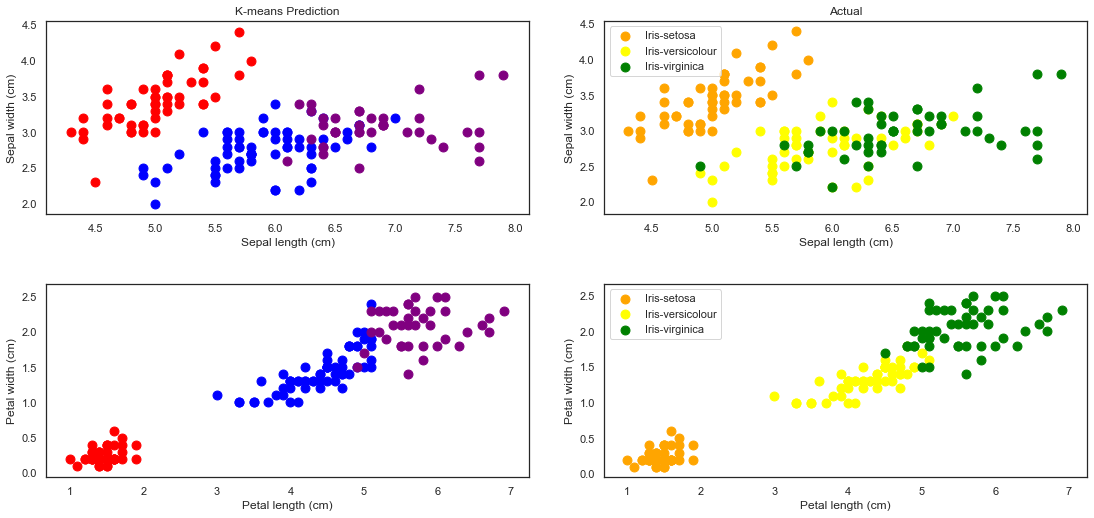

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

axes[0,0].scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'blue')
axes[0,0].scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'red')
axes[0,0].scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1], s = 80, c = 'purple')
axes[0,0].set_xlabel('Sepal length (cm)')
axes[0,0].set_ylabel('Sepal width (cm)')
axes[0,0].set_title('K-means Prediction')

axes[0,1].scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
axes[0,1].scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[0,1].scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
axes[0,1].set_xlabel('Sepal length (cm)')
axes[0,1].set_ylabel('Sepal width (cm)')
axes[0,1].set_title('Actual')
axes[0,1].legend()

axes[1,0].scatter(iris_X[pred_kmeans == 0, 2], iris_X[pred_kmeans == 0, 3], s = 80, c = 'blue')
axes[1,0].scatter(iris_X[pred_kmeans == 1, 2], iris_X[pred_kmeans == 1, 3], s = 80, c = 'red')
axes[1,0].scatter(iris_X[pred_kmeans == 2, 2], iris_X[pred_kmeans == 2, 3], s = 80, c = 'purple')
axes[1,0].set_xlabel('Petal length (cm)')
axes[1,0].set_ylabel('Petal width (cm)')

axes[1,1].scatter(iris_X[iris_Y == 0, 2], iris_X[iris_Y == 0, 3], s = 80, c = 'orange', label = 'Iris-setosa')
axes[1,1].scatter(iris_X[iris_Y == 1, 2], iris_X[iris_Y == 1, 3], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[1,1].scatter(iris_X[iris_Y == 2, 2], iris_X[iris_Y == 2, 3], s = 80, c = 'green', label = 'Iris-virginica')
axes[1,1].set_xlabel('Petal length (cm)')
axes[1,1].set_ylabel('Petal width (cm)')
axes[1,1].legend()

fig.tight_layout(pad=3.0)

When compared to the original actual classes we find that the observations of the class label Iris-setosa have been correctly formed into a separate well-defined cluster (blue points). However for the other two classes, Iris-versicolour and Iris-virginica, the clusters are less accurate (red and purple points). This is mainly because, two class labels overlap each other, particulary for the sepal measurements. This makes it difficult for the K-Means clustering algorithm as it works best for clear neat separate (almost spherical) observations. Still, the clusters have been formed more or less correctly.

<div class="alert alert-block alert-info">
    
<b>Exercise:</b> As highlighted above, the K-Means clustering function in scikit-learn has [parameters - or 'hyperparameters'](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) that you can set. Try running the K-Means model with some of these parameters changed, for example; *init* (method for initialisaiton) and *n_init* (number of times K-Means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia). Plot the results - are there any differences?</div>



In [ ]:
# Enter your code here

##### Feature Scaling

Your preprocessed data may contain features with a mixture of scales for various quantities such as height, temperature, time, length, density, mass, force etc.  
Many machine learning methods expect or are more effective if the data features have the same scale and are close to being normally distributed. Two popular [data scaling](https://en.wikipedia.org/wiki/Feature_scaling) methods are normalisation and standardisation. [Scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) has many methods to preprocess data for machine learning, and which method you need (if any) will depend on your model type and feature values. A helpful discussion of what method to use can be found [here](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02). 

In this example, the four features are similar quantities (length and width) and the same scale (cm), however the features are slightly unbalanced. If we look back at the summary statistics we produced earlier for the dataset, sepal length is ~4x greater petal width.

In [15]:
# Summary Stats
iris_Xdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Thus the mean and variance amongst the features may be different, which could cause the clustering to be imperfect. So lets try rescaling our data using the '[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)' function in sklearn. The StandardScaler standardises features by removing the mean and scaling to unit variance.

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(iris_Xdf)
iris_X_scaled_array = scaler.transform(iris_Xdf)
iris_X_scaled = pd.DataFrame(iris_X_scaled_array, columns = iris_Xdf.columns)

iris_X_scaled.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
147,0.795669,-0.131979,0.819596,1.053935
70,0.068662,0.328414,0.592246,0.790671
141,1.280340,0.098217,0.762758,1.448832
145,1.038005,-0.131979,0.819596,1.448832
17,-0.900681,1.019004,-1.340227,-1.183812


Run the K-Means model with k=3 again on the scaled data:

In [17]:
cluster_Kmeans_sc = KMeans(n_clusters=3)
model_kmeans_sc = cluster_Kmeans_sc.fit(iris_X_scaled)
pred_kmeans_sc = model_kmeans_sc.labels_
pred_kmeans_sc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Now lets plot the results and compare with the actual original classes and the unscaled predicted labels. 

Text(0.5, 1.0, 'K-Means Prediction')

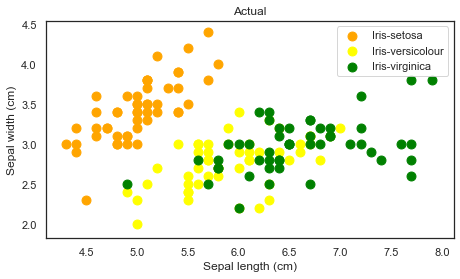

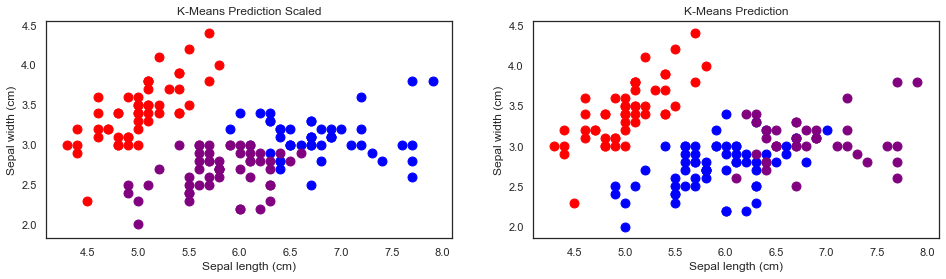

In [18]:
plt.figure(figsize=(7.3,4))
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Actual')
plt.legend()

fig, axes = plt.subplots(1, 2, figsize=(16,4))

axes[0].scatter(iris_X[pred_kmeans_sc == 0, 0], iris_X[pred_kmeans_sc == 0, 1], s = 80, c = 'blue')
axes[0].scatter(iris_X[pred_kmeans_sc == 1, 0], iris_X[pred_kmeans_sc == 1, 1], s = 80, c = 'red')
axes[0].scatter(iris_X[pred_kmeans_sc == 2, 0], iris_X[pred_kmeans_sc == 2, 1], s = 80, c = 'purple')
axes[0].set_xlabel('Sepal length (cm)')
axes[0].set_ylabel('Sepal width (cm)')
axes[0].set_title('K-Means Prediction Scaled')

axes[1].scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'blue')
axes[1].scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'red')
axes[1].scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1], s = 80, c = 'purple')
axes[1].set_xlabel('Sepal length (cm)')
axes[1].set_ylabel('Sepal width (cm)')
axes[1].set_title('K-Means Prediction')

#fig.tight_layout(pad=3.0)

<div class="alert alert-block alert-warning">
<b>Note:</b> Usually feature scaling or any data preprocessing is done in the data preparation stage, <b>before</b> any machine learning techniques (k-means clustering in this example) are applied. In this example we have done it at this point to demonstrate any differences in the resulting clusters. Huge differences are not observed in this example, however it may make a difference to other data sets you apply machine learning, and so feature scaling is something that is recommended at the data preparation stage.</div>


Comparing to the actual classes, the K-means clusters using the scaled data are slightly better for some points but not others. Overall, it looks like the unscaled version may be better.  

<div class="alert alert-block alert-info">

<b>Exercise:</b> Try rescaling the data using a different scaling function, e.g. MinMaxScaler. Then re-run the K-Means model with this rescaled data and plot the results again (compare with the actual original labelled and the unscaled K-Means prediction).</div>

Text(0.5, 1.0, 'K-Means Prediction')

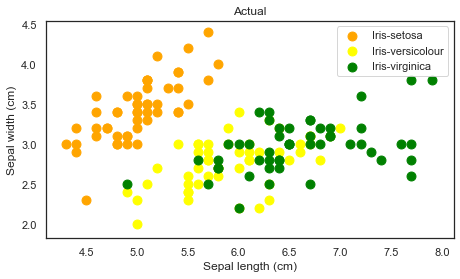

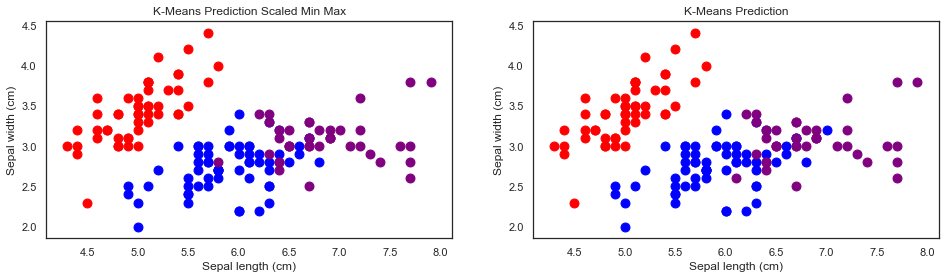

In [21]:
# Enter your code here

So now lets look at some ways of evaluating the K-Means clustering models

##### Evaluation of K-Means Clustering Model

Once clustering has been done, we want to measure how well the clustering has performed. As outlined above in the recap and in the presentation, there are several measures to evaluate the clustering model. Most require ground truth data (i.e. the target labels - in this case the 'Type' data), but there a few metrics that do not require ground truth data, e.g. Silhouette Coefficent.  
We will look at and calculate the **Silhouette Coefficent** for our K-Means model, and then calculate a few other evaluation scores such as; confusion matrix, homogeneity score, completeness score, v measure score, adjusted rand score and AMI score. The latter scores, require ground truth data (i.e. labelled data) to compare against, which in true unsupervised learning we would not have. With the iris dataset, we do have labelled data, so we calculate these measures (becaus we can!) and to provide further evidence as to how the K-Means clustering has performed. 

###### Silhouette Coefficient

We calculate the Silhouette Coefficient (SC) for each data point. A good score is as close to 1 as possible. 
Plotting the mean score across all points for different values of k, is another way to establish the optimal number of clusters (k) to use in the K-Means model.   
We can also plot each individual SC score and sort by cluster. The SC scores in each cluster should ideally be above the mean value as much as possible. Any plot region below the mean value is not desirable, and the width of the plot should be as uniform as possible. 

Lets calculate the SC scores for each point and plot all of these in a SC plot for k=3. Ideally we would put the code below in a function for the SC plot, but for ease in this exercise, the full code is below. 

For n_clusters = 3 The average silhouette_score is : 0.5528190123564091


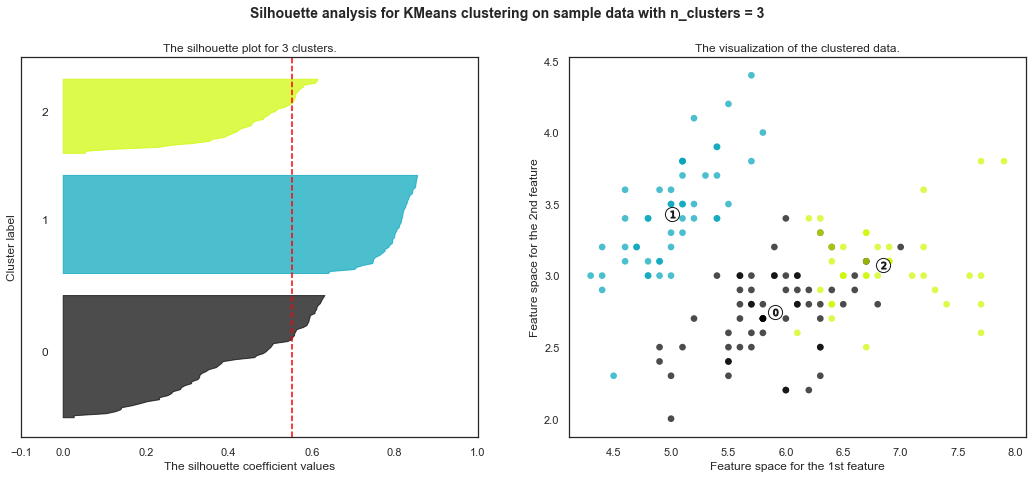

In [151]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

n_clusters = 3
X = iris_X

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value
clusterer = KMeans(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for 3 clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=180, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The average SC is printed out above and is also shown in the SC plot by the dotted red line. Ideally we want as much of the SC scores to be as close to 1 as possible. Cluster 1 (teal coloured points) scores highly and these results again show this as a distinct cluster that the K-Means method has correctly identified.  
Cluster 0 (Black) and cluster 2 (lime) perform less well with many points below the mean SC score and some close to zero indicating that some points are on or are very close to the decision boundary between 2 neighbouring clusters (clusters 0 and 2). This is clear in the feature space plot above and the earlier petal and sepal measurement plots we looked at, which show that two class labels overlap each other, particulary for the sepal measurements. 
This is reflected in the mean SC score which is 0.55 and on the low side. The overlapping of class labels and irregular shape of the data has made it difficult for the K-Means alogorithm in this case. 
The K-Means clustering algorithm works best for clear neat separate (almost spherical) observations. 
Despite this, the clusters have been formed more or less correctly using K-Means. The main issue comes from the prediction labels given to the points where clusters 0 and 2 overlap. 

<div class="alert alert-block alert-info">

<b>Exercise:</b> Try calculating the Silhouette Coeffient scores and plotting the results for the scaled data we tried earlier or one of the scaled methods you tried in the previous excercise. Are the results better or worse than the unscaled data?</div>

In [54]:
# Enter your code here

##### Other performance metrics (supervised ones!) 

The following metrics require ground truth labels, which in reality you may not have (*if you did then one would argue that you should not be doing unsupervised learning - so clustering - but supervised learning*) and so you may only be able to use the Silhouette Coefficent as measure of cluster quality.  
However, the iris data set contains labels, and we will use these to calculate: *confusion matrix, homogeneity score, completeness score, v measure score, adjusted rand score and AMI score*, to provide further information on the K-Means cluster quality.

* The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
* The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
* The V-measure score is the harmonic mean between homogeneity and completeness.
* The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
* The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.

In [72]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'Inertia    Homog   Compl   V-meas  ARI     AMI      Silhouette')
print('%i         %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(cluster_Kmeans.inertia_,
      homogeneity_score(iris_Y, pred_kmeans),
      completeness_score(iris_Y, pred_kmeans),
      v_measure_score(iris_Y, pred_kmeans),
      adjusted_rand_score(iris_Y, pred_kmeans),
      adjusted_mutual_info_score(iris_Y, pred_kmeans),
      silhouette_score(iris_X, pred_kmeans, metric='euclidean')))


print('Confusion Matrix')
print(confusion_matrix(iris_Y, pred_kmeans))

Inertia    Homog   Compl   V-meas  ARI     AMI      Silhouette
78         0.751   0.765   0.758   0.730   0.755    0.553
Confusion Matrix
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


<div class="alert alert-block alert-info">

<b>Exercise:</b> Are these good scores? Have a quick research of these methods and decide whether these are good results or not. Also, try calculating these metrics for the scaled data we tried earlier or one of the scaled methods you tried in the previous excercise. Again, are the results better or worse than the unscaled data?</div>


In [ ]:
# Enter your code here

Now try out another clustering model - Hierarchical Clustering

## Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar.  

Recall that there are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.  

Similar to the talk earlier, we will focus on agglomerative clustering in this example. 

###### Steps in Agglomerative Clustering
1. Assign each point to its own cluster - if you have N points, then you start with N clusters each containing one point
2. Find closest (most similar) pair of clusters and merge them into a single cluster, therefore you now have one less cluster
3. Compute distances between the new cluster and each of old clusters
4. Repeat steps 2 and 3 until all data points are clustered into a single cluster of size N

Once a single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

##### Closeness and Distance
There are multiple ways to define what "close" is. In the talk, I assumed that it was the shortest distance between a pair of points in two clusters. However, there are multiple ways of calculating distance between two clusters (this detail was not covered in the talk):
* *Single-Linkage*: Measure the distance between the closest points of two clusters (what was assumed in the talk). Also known as *nearest neighbour*.
* *Complete-Linkage*: Measure the distance between the farthest points of two clusters. Also know as *furthest neighbour*. 
* *Centroid-Linkage*: Measure the distance between the centroids of two clusters.
* *Average-Linkage*: Measure the distance between all possible combination of points between the two clusters and take the mean.
* *Ward-Linkage*: Measures the distance by minimising the variance of the clusters being merged. The *Ward* linkage method is the default linkage parameter setting in `sklearn.cluster.AgglomerativeClustering`.

The distance itself can be also be defined in multiple ways (!) e.g. Euclidian distance or Manhattan distance.  

##### Dendogram
Once the one large cluster is formed, by the combination of small clusters, a dendogram of the clusters is used to actually split the large cluster into N small clusters.

Lets now look at an example to show how it is done. 

##### Import Library

In [48]:
from sklearn.cluster import AgglomerativeClustering

##### Import the library that will allow us to create dendograms

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

To plot the dendogram, we use the dataframe we created back at the beginning that we created from the original iris data array - `Iris_Xdf`. This is a dataframe of the unlabelled iris dataset. 

We use the following code to plot the dendogram to help us decide what the threshold values should be for the clustering algorithm, i.e. we decide on the number of clusters by using this dendogram. 

Text(0, 0.5, 'Euclidean distance in the space with other variables')

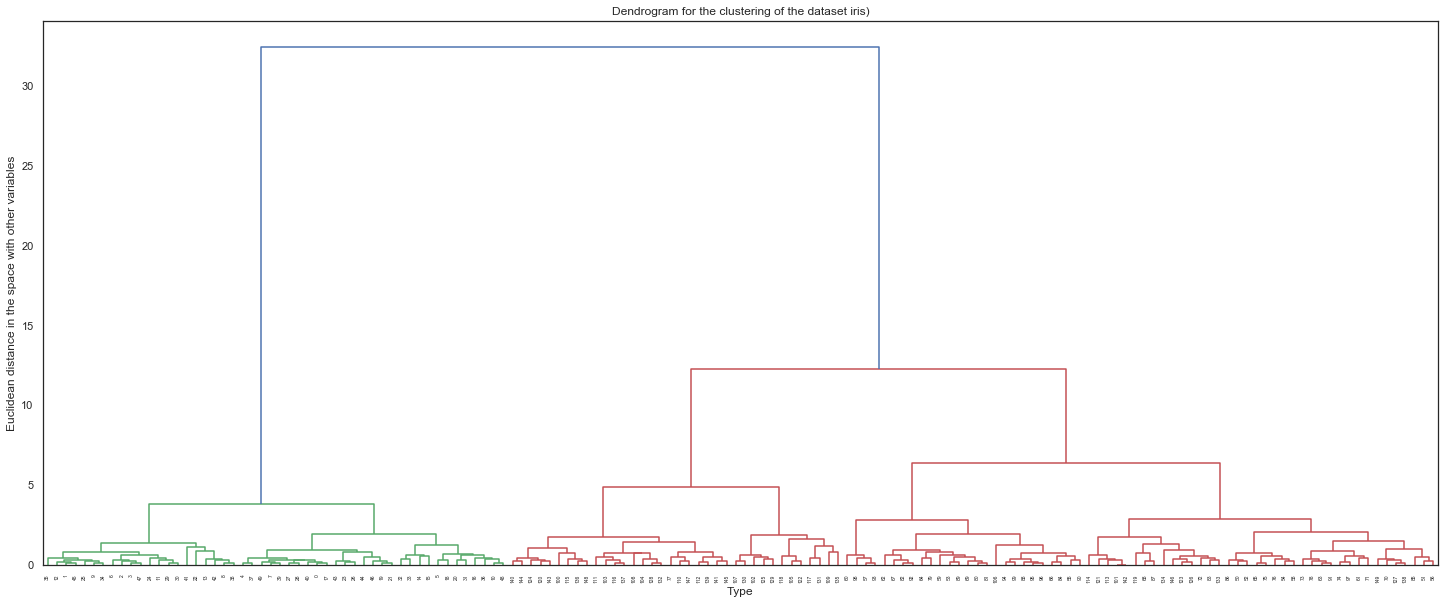

In [52]:
# Ward is the default linkage of the algorithm in sklearn
link = linkage(iris_Xdf, method = 'ward')
plt.figure(figsize=(25,10))
den = dendrogram(link)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

The vertical y axis represents the distance (disimilarity) between the clusters - in the example above this is Euclidean distance. The horizontal x axis represents the points and clusters. So how do we interpret the dendogram? Remember that our main interest is in similarity within clusters, and disimilarity between clusters (remember minimise distance within cluster, maximise distance between clusters).  
Each joining of two clusters is represented on the dendogram by the splitting of a vertical line into two vertical lines. The vertical position of this split, shown by the short horizontal bar/line, gives the distance (disimilarity) between the two clusters.  
So looking at this dendogram, you can see that there are three clusters that form at about the same vertical distance (~4 to 6). You want to cut the dendogram at a vertical distance where there is a 'lot' of space to cut them, i.e. where the jump in levels of two consecutive clusters is large. So again this suggests somewhere around y = 8 (our threshold), which would result in 3 clusters. 


<div class="alert alert-block alert-warning">
<b>Note:</b> If our threshold is too high, we get closer more generalised clusters, while if our threshold is too low, we can get a lot of clusters which are too fine-grained (high-resolution) to be of any meaning.</div>


##### Generate the Agglomerative Hierarchical Cluster

###### Initialise and Fit Model

Based on our above analysis of the dendogram, we decide that there will be three clusters.

<div class="alert alert-block alert-warning">
    
<b>Note:</b> The Agglomerative clustering function in scikit-learn has parameters (hyperparameters) that you can set. Read more about them [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). In this example, we are using the default settings, and only setting the number of clusters.</div>


In [56]:
cluster_H = AgglomerativeClustering(n_clusters=3)            # Initialise Model
model_H = cluster_H.fit(iris_X)                              # Fit Model
pred_H = model_H.labels_                                     # Class labels
pred_H                                                       # print results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

The above output array contains the Agglomerative Hierarchical clustering predicted labels: 0, 1 or 2 (groups of each flower) for each sample/row of data in the unsupervised learning iris dataset (iris_X).

We can plot this to visualise better. As we did with the K-Means model results, lets plot and compare the Agglomerative clustering results for 3 clusters with the actual iris flower types. 


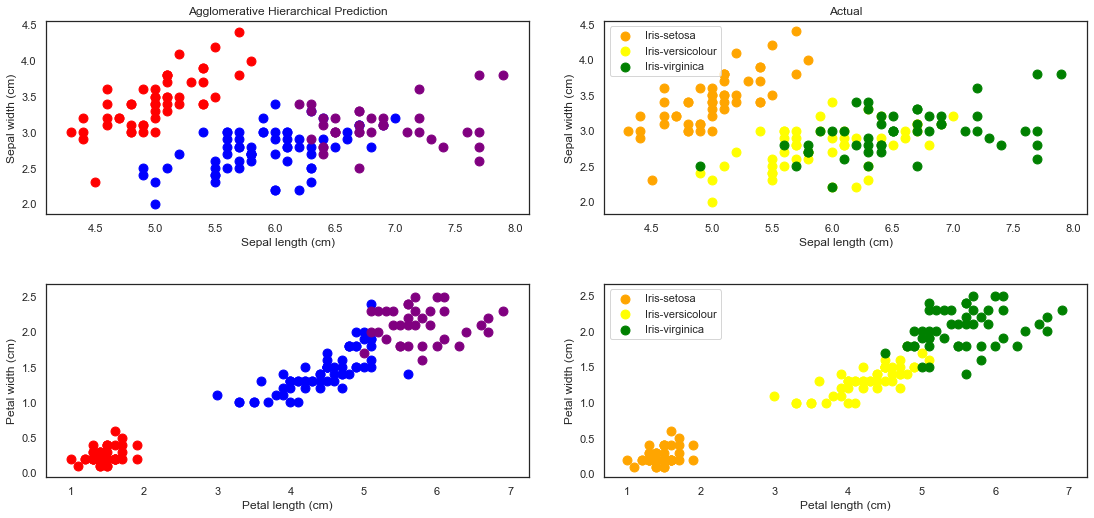

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

axes[0,0].scatter(iris_X[pred_H == 0, 0], iris_X[pred_H == 0, 1], s = 80, c = 'blue')
axes[0,0].scatter(iris_X[pred_H == 1, 0], iris_X[pred_H == 1, 1], s = 80, c = 'red')
axes[0,0].scatter(iris_X[pred_H == 2, 0], iris_X[pred_H == 2, 1], s = 80, c = 'purple')
axes[0,0].set_xlabel('Sepal length (cm)')
axes[0,0].set_ylabel('Sepal width (cm)')
axes[0,0].set_title('Agglomerative Hierarchical Prediction')

axes[0,1].scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
axes[0,1].scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[0,1].scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
axes[0,1].set_xlabel('Sepal length (cm)')
axes[0,1].set_ylabel('Sepal width (cm)')
axes[0,1].set_title('Actual')
axes[0,1].legend()

axes[1,0].scatter(iris_X[pred_H == 0, 2], iris_X[pred_H == 0, 3], s = 80, c = 'blue')
axes[1,0].scatter(iris_X[pred_H == 1, 2], iris_X[pred_H == 1, 3], s = 80, c = 'red')
axes[1,0].scatter(iris_X[pred_H == 2, 2], iris_X[pred_H == 2, 3], s = 80, c = 'purple')
axes[1,0].set_xlabel('Petal length (cm)')
axes[1,0].set_ylabel('Petal width (cm)')

axes[1,1].scatter(iris_X[iris_Y == 0, 2], iris_X[iris_Y == 0, 3], s = 80, c = 'orange', label = 'Iris-setosa')
axes[1,1].scatter(iris_X[iris_Y == 1, 2], iris_X[iris_Y == 1, 3], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[1,1].scatter(iris_X[iris_Y == 2, 2], iris_X[iris_Y == 2, 3], s = 80, c = 'green', label = 'Iris-virginica')
axes[1,1].set_xlabel('Petal length (cm)')
axes[1,1].set_ylabel('Petal width (cm)')
axes[1,1].legend()

fig.tight_layout(pad=3.0)

The Agglomerative prediction plots are actually pretty similar to the K-means results and plots. They show three clusters; again one distinct cluster (red points this time) and two clusters overlapping each other (blue and purple points this time), which is again particularly evident in the sepal measurements. 
So the Agglomerative prediction results compare very simiarly with the actual classes as the K-means model did; 
* the observations of the class label Iris-setosa have been correctly formed into a separate well-defined cluster (red points). 
* However for the other two classes, Iris-versicolour and Iris-virginica, the clusters are less accurate (blue and purple points). 
* This is mainly because, two class labels overlap each other, particulary for the sepal measurements. 
* However, as with K-Means, the clusters have been formed more or less correctly

<div class="alert alert-block alert-info">
    
<b>Exercise:</b> As highlighted above, the Agglomerative clustering function in scikit-learn has [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) that you can set. Try running the K-Means model with some of these parameters changed, for example; *n_clusters* (number of clusters), *affinity* (method used to complete distance linkage, e.g. euclidean (default), manhattan) and *linkage* (which linkage criterion to use e.g. single, complete, average, ward is the default). Plot the results - are there any differences?</div>

#### Evaluation of Agglomerative Clustering Model

As we did with the K-Means model, we will look at and calculate the Silhouette Coefficent (SC) for our K-Means model, and then calculate the ground truth metrics (e.g. confusion matrix, homogeneity score, completeness score, v measure score, adjusted rand score and AMI score). Again if we had a true unsupervised unlabelled dataset, we would not be able to compute these metrics. With the iris dataset, we do have labelled data, so we calculate these measures to provide further evidence as to how Agglomerative clustering has performed.

##### Silhouette Coefficient

Lets calculate the SC scores for each point of the Agglomerative clustering model and plot all of these in a SC plot for 3 clusters. 

For n_clusters = 3 The average silhouette_score is : 0.5543236611296415


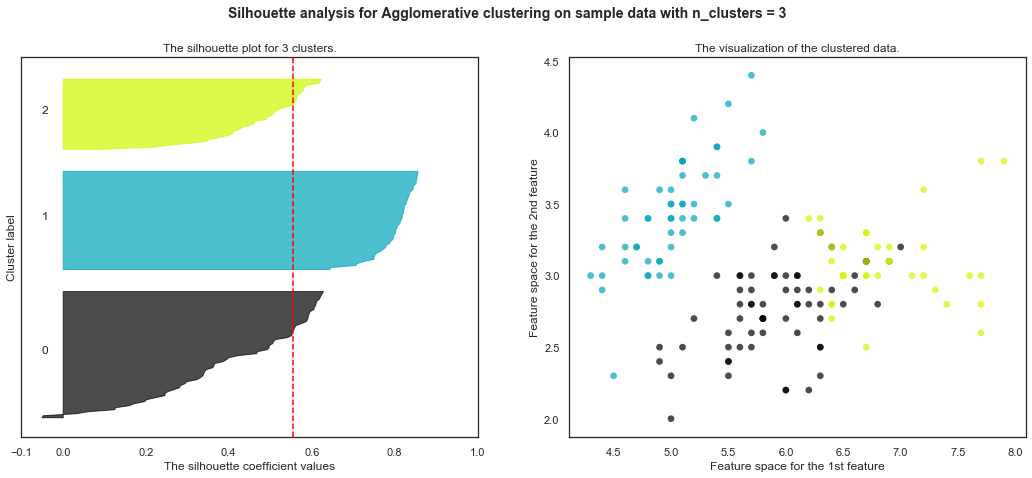

In [59]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

n_clusters = 3
X = iris_X

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value
clusterer = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for 3 clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=180, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The average SC is printed out above and is also shown in the SC plot by the dotted red line. It is very similar to the average SC score for K-Means, and is in fact slightly better. Cluster 1 (teal coloured points) scores highly and these results again show this as a distinct cluster that the Agglomerative clustering method has also correctly identified.
Cluster 0 (Black) and cluster 2 (lime) also perform less well for Agglomerative clustering with many points below the mean SC score; some points are close to zero indicating that some points are on or are very close to the decision boundary between the 2 neighbouring clusters 0 and 2, and some points are even slightly negative (in cluster 0) indicating that these points may have been assigned to the wrong cluster. This is again likely due to the overlapping of class labels 0 and 2. Despite this, the Agglomerative clusters have been formed more or less correctly. The main issue comes from the prediction labels given to the points where clusters 0 and 2 overlap.


###### Other performance metrics (supervised ones!)

As we did with K-Means, because we have the target labels in the iris data, we calculate the: confusion matrix, homogeneity score, completeness score, v measure score, adjusted rand score and AMI score, to provide further information on the Agglomerative cluster quality.


In [71]:
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'Homog   Compl   V-meas  ARI     AMI      Silhouette')
print('%.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(homogeneity_score(iris_Y, pred_H),
      completeness_score(iris_Y, pred_H),
      v_measure_score(iris_Y, pred_H),
      adjusted_rand_score(iris_Y, pred_H),
      adjusted_mutual_info_score(iris_Y, pred_H),
      silhouette_score(iris_X, pred_H, metric='euclidean')))

print('Confusion Matrix')
print(confusion_matrix(iris_Y, pred_H))

Homog   Compl   V-meas  ARI     AMI      Silhouette
0.761   0.780   0.770   0.731   0.767    0.554
Confusion Matrix
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


<div class="alert alert-block alert-info">
    
<b>Exercise:</b> How do these compare with the K-Means results?</div>

## Density Based Spatial Clustering of Applications with Noise (DBScan) 

We did not cover DBSCAN in the introductory talk due to time, but have it in this tutotrial as DBSCAN is a different type of clustering algorithm with some unique advantages.  

As the name indicates, DBSCAN is a density based method, which focuses more on the proximity and density of points to form clusters and can be used to identify clusters of any shape in a data set containing noise and outliers. This is very different from K-Means, where a point becomes a part of cluster represented by its nearest centroid. DBSCAN clustering can identify outliers, points which won’t belong to any cluster. Since DBSCAN clustering identifies the number of clusters as well, it is useful with unsupervised learning of data when we don’t know how many clusters there may be.

K-Means clustering may cluster loosely related points together. Every point becomes a part of some cluster eventually, even if the points are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. Slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed.

#### Algorithm
The goal is to identify dense regions, which can be measured by the number of objects close to a given point.

Two important parameters are required for DBSCAN: ε (“eps”) and *minimum points* (“MinPts”). The parameter *eps* defines the radius of neighborhood around a point x. It’s called called the ε-neighborhood of x. The parameter MinPts is the minimum number of neighbours within “eps” radius.

Any point x in the data set, with a neighbour count greater than or equal to MinPts, is marked as a *core point*. We say that x is *border point*, if the number of its neighbours is less than MinPts, but it belongs to the ε-neighbourhood of some core point z. Finally, if a point is neither a core nor a border point, then it is called a *noise point* or an outlier.

The figure below shows the different types of points (core, border and outlier points) using MinPts = 6. Here x is a core point because *neighbours<sub>ϵ</sub>(x)*=6, y is a border point because *neighbours<sub>ϵ</sub>(y)*<MinPts, but it belongs to the ϵ-neighborhood of the core point x. Finally, z is a noise point.


![alt text](dbscan-principle.png "DBSCANexample")

A density-based cluster is defined as a group of density connected points. The algorithm of density-based clustering (DBSCAN) works as follows:  
* For each point x<sub>i</sub>, compute the distance between x<sub>i</sub> and the other points. Finds all neighbour points within distance eps of the starting point (x<sub>i</sub>). Each point, with a neighbour count greater than or equal to MinPts, is marked as core point or visited.
* For each core point, if it’s not already assigned to a cluster, create a new cluster. Find recursively all its density connected points and assign them to the same cluster as the core point.
* Iterate through the remaining unvisited points in the data set.
* Those points that do not belong to any cluster are treated as outliers or noise.



##### Import Library

In [73]:
from sklearn.cluster import DBSCAN

###### Initialise and Fit Model

In [103]:
cluster_dbscan = DBSCAN(eps=0.9, min_samples=5)                    # Initialise Model (min_samples = MinPts)
model_dbscan = cluster_dbscan.fit(iris_X)           # Fit Model
pred_dbscan = model_dbscan.labels_                 # Class labels
print('Unique labels are:',set(pred_dbscan))
pred_dbscan
    

Unique labels are: {0, 1}


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The above output array contains the DBSCAN predicted labels, and has predicted **4** labels: -1, 0, 1 and 2 with the '-1' label indicating outliers. Remember with DBSCAN we do not have to know the number of clusters before running, DBSCAN identifies the number of clusters. In this example it has correctly identified 3 clusters.

We can plot this to visualise better. As we did with the K-Means and Agglomerative model results, lets plot and compare the DBSCAN clustering results with the actual iris flower types. 

##### Visualise

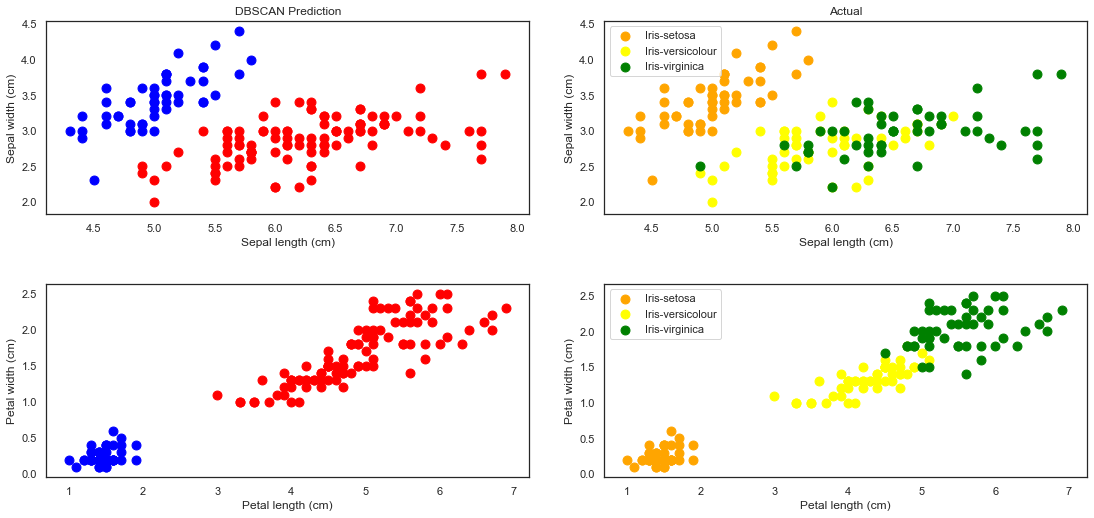

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

axes[0,0].scatter(iris_X[pred_dbscan == 0, 0], iris_X[pred_dbscan == 0, 1], s = 80,  c = 'blue')
axes[0,0].scatter(iris_X[pred_dbscan == 1, 0], iris_X[pred_dbscan == 1, 1], s = 80, c = 'red')
axes[0,0].scatter(iris_X[pred_dbscan == 2, 0], iris_X[pred_dbscan == 2, 1], s = 80, c = 'purple')
axes[0,0].scatter(iris_X[pred_dbscan == -1, 0], iris_X[pred_dbscan == -1, 1], s = 80, c = 'black', label = 'outlier')
axes[0,0].set_xlabel('Sepal length (cm)')
axes[0,0].set_ylabel('Sepal width (cm)')
axes[0,0].set_title('DBSCAN Prediction')

axes[0,1].scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
axes[0,1].scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[0,1].scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
axes[0,1].set_xlabel('Sepal length (cm)')
axes[0,1].set_ylabel('Sepal width (cm)')
axes[0,1].set_title('Actual')
axes[0,1].legend()

axes[1,0].scatter(iris_X[pred_dbscan == 0, 2], iris_X[pred_dbscan == 0, 3], s = 80,  c = 'blue')
axes[1,0].scatter(iris_X[pred_dbscan == 1, 2], iris_X[pred_dbscan == 1, 3], s = 80, c = 'red')
axes[1,0].scatter(iris_X[pred_dbscan == 2, 2], iris_X[pred_dbscan == 2, 3], s = 80, c = 'purple')
axes[1,0].scatter(iris_X[pred_dbscan == -1, 2], iris_X[pred_dbscan == -1, 3], s = 80, c = 'black', label = 'outlier')
axes[1,0].set_xlabel('Petal length (cm)')
axes[1,0].set_ylabel('Petal width (cm)')

axes[1,1].scatter(iris_X[iris_Y == 0, 2], iris_X[iris_Y == 0, 3], s = 80, c = 'orange', label = 'Iris-setosa')
axes[1,1].scatter(iris_X[iris_Y == 1, 2], iris_X[iris_Y == 1, 3], s = 80, c = 'yellow', label = 'Iris-versicolour')
axes[1,1].scatter(iris_X[iris_Y == 2, 2], iris_X[iris_Y == 2, 3], s = 80, c = 'green', label = 'Iris-virginica')
axes[1,1].set_xlabel('Petal length (cm)')
axes[1,1].set_ylabel('Petal width (cm)')
axes[1,1].legend()

fig.tight_layout(pad=3.0)


We can see that using DBSCAN with eps=0.42, has produced 4 groups with many points marked as outliers (black points) which form one of the 4 groups. So it is a 3 cluster solution with one group of outliers. The results are very sensitve to the input parameters (hyperparameters); eps and min_samples. Changing these can change the solution from 2 to 3 cluster solution without and with outliers (The default settings are eps=0.5 and min_samples=5). The distance parameter, eps is the distance a point is to the nearest cluster. The greater the value the distance, the fewer clusters are found. With eps=0.42, the -1 outlier labels are scattered around clusters 1 and 2 (red and purple) in a few locations:
* near the edges of cluster 1 and 2 (red and purple, the iris-versicolour and iris-virginica classes)
* near the centre of cluster 1 (red, the iris-versicolour class)
* 1 or 2 instances near the edges of cluster 0 (blue, the iris-setosa class)

In this example, DBSCAN did not produce the ideal outcome with the eps = 0.42 or the default parameters for the Iris dataset. 

The Iris dataset does not take advantage of DBSCAN’s most powerful features — **noise detection and the capability to discover clusters of arbitrary shapes**. However, DBSCAN is a very popular clustering algorithm and research is still being done on improving its performance.

<div class="alert alert-block alert-info">
    
<b>Exercise:</b> As highlighted above, the DBSCAN clustering function in scikit-learn has [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#) that you can set. Try varying the *eps* parameter (the most important parameter) and *min_samples* parameter, and  see what happens by plotting the results.</div>



# 3. Other Data Sets and Useful Resources

<div class="alert alert-block alert-info">
    
<b>Exercise:</b> Try building and applying the models in this notebook to some of the other ['toy' datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) available in scikit-learn, for example, the 'digits' or 'wine' datasets. </div>

<div class="alert alert-block alert-info">
    
<b>Exercise:</b> Try building and applying the models in this notebook to some of the [real life datasets](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets) available in scikit-learn, which are much larger datasets. How different is it applying K-Means and Hiearchical clustering to these much larger datasets - how do K-Means and Hierarchical clustering compare (think about how fast it is to run, how easy is it to interpret e.g. the dendogram)?  </div>


* [Python Data Science Handbook (with Jupyter Notebooks)](https://jakevdp.github.io/PythonDataScienceHandbook/): This is overall a very useful handbook for Machine Learning and Python, but there is also a nice [chapter on K-Means clustering](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb) which you could run through if you get through this notebook. 
* [Google Machine Learning Chapter on Clustering](https://developers.google.com/machine-learning/clustering): This is also a very useful resource for Machine Learning and the clustering section is really useful. 
* We have listed lots of other useful Machine Learning Resources on the [BG-ML-learning GitHub page](https://github.com/claire-bartholomew/BG-ML-learning/). 

# 4. Conclusions

In this notebook, we have recapped on some of the clustering theory introduced in our talk, focussing on two popular methods: K-Means and Hierarchical Clustering, and gained an understand of how these models work by building K-Means and Hierarchical clustering models in Python, using one of the 'toy' Iris sata set in scikit-learn. We also briefly looked at building and applying a DBSCAN model to the Iris data set as while this model is not best suited to the iris dataset, it is a powerful clustering tool and wanted to highlight its ability to cluster arbitrary shapes, detect noise without having to specify the number of clusters. 

A few key points to take away are:  
* Prepare  your data before you applying any clustering technique to your data:
    - ensure data in correct format, deal with missing values, consider scaling and preprocessing your data, 
* What is the best clustering method for your data? The K-Means and Hierachical models we introduced have several strengths and weaknesses - bear these in mind when assessing what model is suitable for your data. For example, this tutorial showed that perhaps the K-Means model may not be the best model for clustering the Iris Dataset, as the Iris data when plotted does not form nice spherical even clusters - but irregular, overlapping clusters.  
   * There are other clustering methods (which we have not covered in this introductory session) that may be more suitable for your data, e.g. distribution or density based models. 
* K-Means and Hiearchical clustering methods are both easy to implement. 